### Dataset in the from of a csv file contains demographics of the customer and if they clicked the ad or not . 0 means the ad was not clicked and 1 means clicked.
### This data set contains the following features:
#### 'User ID': unique identification for consumer
#### 'Age': cutomer age in years
#### 'Estimated Salary': Avg. Income of consumer
####  'Gender': Whether consumer was male or female
#### 'Purchased': 0 or 1 indicated clicking on Ad


In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        return z
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
import pandas as pd

data = pd.read_csv(r"Social_Network_Ads.csv")
print("The columns are",data.columns)
data = data.sort_values(by = ['Purchased']).reset_index(drop = True)
data

The columns are Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15685576,Male,26,16000,0
2,15774727,Female,31,71000,0
3,15603319,Male,33,43000,0
4,15759066,Female,33,60000,0
...,...,...,...,...,...
395,15609669,Female,59,88000,1
396,15750447,Male,37,70000,1
397,15663249,Female,52,21000,1
398,15692819,Female,57,26000,1


In [4]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
data.Purchased.unique()

array([0, 1], dtype=int64)

In [6]:
np.where(data.Purchased == 1)[0][0]

257

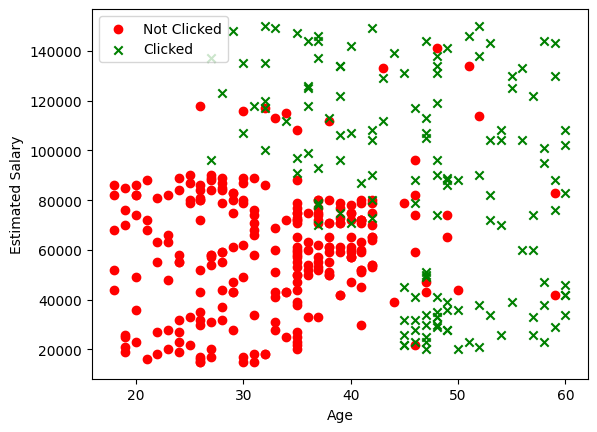

In [7]:
y = data.iloc[:, 4].values

# extract age and salary
X = data.iloc[:, [2, 3]].values

# plot data
plt.scatter(X[:257, 0], X[:257, 1],
            color='red', marker='o', label='Not Clicked')
plt.scatter(X[257:, 0], X[257:, 1],
            color='green', marker='x', label='Clicked')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(loc='upper left')
plt.show()

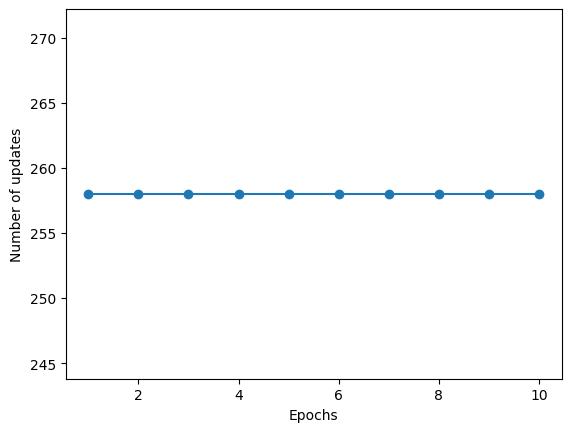

In [8]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [9]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

C:\Users\Priya\AppData\Local\Temp\ipykernel_17732\3926436729.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


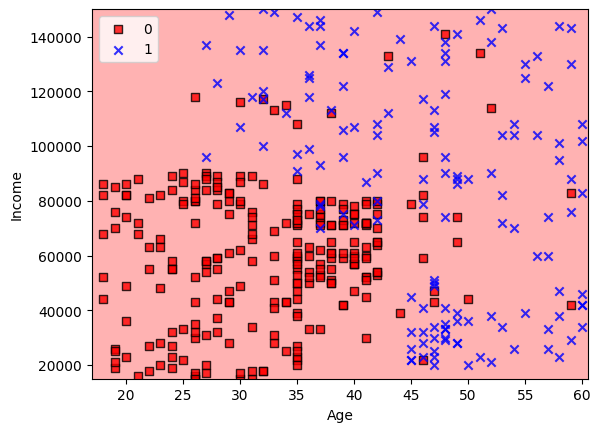

In [10]:
plot_decision_regions(X, y,ppn,0.5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(loc='upper left')
plt.show()

In [11]:
ppn = Perceptron(0.01, 50, 1)

In [12]:
ppn.fit(X,y)

In [13]:
ppn.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [14]:
ppn.net_input(X)

array([ 3418284.28737681,  2877705.50970642, 12776990.28465486,
        7736968.28051037, 10796878.49131248, 11877016.69324247,
       14757866.59305532,  7376978.84394541, 12956645.21846708,
        5757451.10999093, 15117516.24515001,  4678247.31535415,
        7737308.06498062, 12598014.91978315, 16017150.05209215,
        7736883.3343928 , 14217032.97703224,  6478109.55206136,
       17275584.04995333, 14036188.79757412, 11695492.94484384,
        7735779.03486447, 10436719.1625124 ,  7554764.96317122,
        6117185.7082032 ,  3955974.89705001,  8455757.90799438,
       12776140.82347922, 13315445.40938614,  7016819.51514533,
        5936766.2593329 , 14397367.47978498, 20514979.30233254,
       14396093.28802151,  4137838.42991889,  8456777.26140515,
       12238110.42933576, 10616713.88079488, 16016980.15985702,
        4496978.40530821, 16017489.8365624 ,  5396357.37389765,
       10977212.99406521, 13317908.8467955 ,  2697710.79142395,
        8096278.14813481, 13676963.87606